<a href="https://colab.research.google.com/github/Azeezhamzat/My-DS-Journey/blob/main/My_Best_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 2. Feature Engineering.ipynb

## 2. Reading and Summarizing Data

In [ ]:
# for Importing the Dataset
import pandas as pd

In [ ]:
## First we install the potentially important packages

!pip install unidecode
!pip install word2number
!pip install contractions
!pip install bs4
!pip install nltk
!pip install inflect

     |████████████████████████████████| 235 kB 12.0 MB/s 
  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5582 sha256=935f568c7c9d2a5e002d0ace340a88a30969e428e27d039f91421e3fe3499383
  Stored in directory: /root/.cache/pip/wheels/4b/c3/77/a5f48aeb0d3efb7cd5ad61cbd3da30bbf9ffc9662b07c9f879
Successfully built word2number
     |████████████████████████████████| 284 kB 13.8 MB/s 
     |████████████████████████████████| 106 kB 68.6 MB/s 


In [ ]:
import warnings
warnings.filterwarnings("ignore")
## Then we import the modules

from bs4 import BeautifulSoup
import unidecode
from word2number import w2n
import contractions
import re
import nltk
nltk.download('all')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

In [ ]:
# lets read the dataset
data = pd.read_csv('amazon_alexa.tsv', delimiter = '\t')

# lets check the shape of the dataset
data.shape

(3150, 5)

In [ ]:
# lets check the head of the dataset
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [ ]:
# lets check if the dataset has any Missing Values
data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [ ]:
# lets check the Descriptive Summary of the Dataset
data.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [ ]:
# lets check the summary of Date, Variation and Reviews
data.describe(include = 'object')

,date,variation,verified_reviews
count,3150,3150,3150
unique,77,16,2301
top,30-Jul-18,Black Dot,
freq,1603,516,79


In [ ]:
# lets check the Value Counts for Variation 
data['variation'].value_counts()

Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: variation, dtype: int64

## 3. Finding the Length, Polarity and Subjectivity of the Text

In [ ]:
#1pip install textblob

In [ ]:
# for Importing the Dataset
import pandas as pd

# for calculating Polarity and Subjectivity
from textblob import TextBlob

In [ ]:
# Lets calculate the length of the Reviews
data['length'] = data['verified_reviews'].apply(len)

### Text Polarity

It is the expression that determines the sentimental aspect of an opinion. In textual data, the result of sentiment analysis can be determined for each entity in the sentence, document or sentence. The sentiment polarity can be determined as positive, negative and neutral.

In [ ]:
# Lets calculate the Polarity of the Reviews
def get_polarity(text):
    textblob = TextBlob(str(text.encode('utf-8')))
    pol = textblob.sentiment.polarity
    return pol

# lets apply the function
data['polarity'] = data['verified_reviews'].apply(get_polarity)

### Text Subjectivity

In natural language, subjectivity refers to expression of opinions, evaluations, feelings, and speculations and thus incorporates sentiment. Subjective text is further classified with sentiment or polarity.

In [ ]:
# Lets calculate the Subjectvity of the Reviews
def get_subjectivity(text):
    textblob = TextBlob(str(text.encode('utf-8')))
    subj = textblob.sentiment.subjectivity
    return subj

# lets apply the Function
data['subjectivity'] = data['verified_reviews'].apply(get_subjectivity)

In [ ]:
## lets summarize the Newly Created Features
data[['length','polarity','subjectivity']].describe()

,length,polarity,subjectivity
count,3150.000000,3150.000000,3150.000000
mean,132.049524,0.349792,0.528922
std,182.099952,0.303362,0.256324
min,1.000000,-1.000000,0.000000
25%,30.000000,0.123852,0.419196
50%,74.000000,0.350000,0.585000
75%,165.000000,0.533333,0.695486
max,2851.000000,1.000000,1.000000


## 4. Finding the Words, Characters, and Punctuation Count

In [ ]:
# calculating the Character Count in the Reviews
data['char_count'] = data['verified_reviews'].apply(len)

In [ ]:
# calculating the Word Count
data['word_count'] = data['verified_reviews'].apply(lambda x: len(x.split()))

In [ ]:
# Calculating the Word Density
data['word_density'] = data['char_count'] / (data['word_count']+1)

In [ ]:
# importing the List of Punctuations
import string
punctuation = string.punctuation

# Calculating the Punctuation Count
data['punctuation_count'] = data['verified_reviews'].apply(lambda x: len("".join(_ for _ in x if _ in punctuation))) 

In [ ]:
## lets summarize the Newly Created Features
data[['char_count','word_count','word_density','punctuation_count']].describe()

,char_count,word_count,word_density,punctuation_count
count,3150.000000,3150.000000,3150.000000,3150.000000
mean,132.049524,25.293016,4.605345,3.887937
std,182.099952,34.584971,1.134737,5.762348
min,1.000000,0.000000,0.500000,0.000000
25%,30.000000,6.000000,4.269231,1.000000
50%,74.000000,14.000000,4.805665,2.000000
75%,165.000000,32.000000,5.207974,5.000000
max,2851.000000,526.000000,32.500000,121.000000


## 5. Counting Nouns and Verbs in the Text

In [ ]:
# lets create a Part of speech Dictionary
pos_dic = {
    'noun' : ['NN','NNS','NNP','NNPS'],
    'pron' : ['PRP','PRP$','WP','WP$'],
    'verb' : ['VB','VBD','VBG','VBN','VBP','VBZ'],
    'adj' :  ['JJ','JJR','JJS'],
    'adv' : ['RB','RBR','RBS','WRB']
}

# function to check and get the part of speech tag count of a words in a given sentence
def pos_check(x, flag):
    cnt = 0
    try:
        wiki = TextBlob(x)
        for tup in wiki.tags:
            ppo = list(tup)[1]
            if ppo in pos_dic[flag]:
                cnt += 1
    except:
        pass
    return cnt

### Nouns

A noun is a word that functions as the name of a specific object or set of objects, such as living creatures, places, actions, qualities, states of existence, or ideas. However, noun is not a semantic category, so that it cannot be characterized in terms of its meaning.

In [ ]:
# lets calculate the count of Nouns in the Text
data['noun_count'] = data['verified_reviews'].apply(lambda x: pos_check(x, 'noun'))

### Verbs

A verb, from the Latin verbum meaning word, is a word that in syntax conveys an action, an occurrence, or a state of being. In the usual description of English, the basic form, with or without the particle to, is the infinitive. In many languages, verbs are inflected to encode tense, aspect, mood, and voice.

In [ ]:
# lets calculate the count of Verbs in the Text
data['verb_count'] = data['verified_reviews'].apply(lambda x: pos_check(x, 'verb'))

In [ ]:
#3 lets summarize the Newly Created Features
data[['noun_count','verb_count']].describe()

,noun_count,verb_count
count,3150.000000,3150.000000
mean,5.927302,5.144444
std,8.206844,7.211263
min,0.000000,0.000000
25%,1.000000,1.000000
50%,3.000000,3.000000
75%,7.000000,7.000000
max,137.000000,101.000000


## 6. Counting Adjectives, Adverbs, and Pronouns

### Adjectives

In linguistics, an adjective is a word that modifies a noun or noun phrase or describes its referent. Its semantic role is to change information given by the noun. Adjectives are one of the main parts of speech of the English language, although historically they were classed together with nouns.

In [ ]:
# lets calculate the Count of Adjectives in the Text
data['adj_count'] = data['verified_reviews'].apply(lambda x: pos_check(x, 'adj'))

### Adverbs

An adverb is a word or an expression that modifies a verb, adjective, another adverb, determiner, clause, preposition, or sentence. Adverbs typically express manner, place, time, frequency, degree, level of certainty, etc., answering questions such as how?, in what way?, when?, where?, and to what extent?

In [ ]:
# lets calculate the count of Adverbs in the Text
data['adv_count'] = data['verified_reviews'].apply(lambda x: pos_check(x, 'adv'))

### Pronouns

A pronoun (I, me, he, she, herself, you, it, that, they, each, few, many, who, whoever, whose, someone, everybody, etc.) is a word that takes the place of a noun. In the sentence Joe saw Jill, and he waved at her, the pronouns he and her take the place of Joe and Jill, respectively.

In [ ]:
# lets calculate the count of Pronouns in the Text
data['pron_count'] = data['verified_reviews'].apply(lambda x: pos_check(x, 'pron'))

In [ ]:
## lets summarize the Newly Created features
data[['adj_count','adv_count','pron_count']].describe()

,adj_count,adv_count,pron_count
count,3150.000000,3150.000000,3150.000000
mean,2.170476,2.002540,3.236825
std,2.940257,3.276017,4.622673
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,1.000000,1.000000,2.000000
75%,3.000000,3.000000,4.000000
max,39.000000,54.000000,70.000000


# DATA CLEANING

## 1. Removing Punctuations and Numbers

In [ ]:
# for Importing the Dataset
import pandas as pd

# for data cleaning
import string

In [ ]:
# lets read the dataset
data = pd.read_csv('amazon_alexa.tsv', delimiter = '\t')

# lets check the shape of the dataset
data.shape

# lets check the head of the dataset
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [ ]:
# First lets remove Punctuations from the Reviews
def punctuation_removal(messy_str):
    clean_list = [char for char in messy_str if char not in string.punctuation]
    clean_str = ''.join(clean_list)
    return clean_str

data['verified_reviews'] = data['verified_reviews'].apply(punctuation_removal)

In [ ]:
# lets make a function to remove Numbers from the reviews
import re
def drop_numbers(list_text):
    list_text_new = []
    for i in list_text:
        if not re.search('\d', i):
            list_text_new.append(i)
    return ''.join(list_text_new)

data['verified_reviews'] = data['verified_reviews'].apply(drop_numbers)

In [ ]:
# lets visualize the Top 10 Reviews after Removal of Punctuations and Numbers
data['verified_reviews'].head(10)

0                                         Love my Echo
1                                             Loved it
2    Sometimes while playing a game you can answer ...
3    I have had a lot of fun with this thing My  yr...
4                                                Music
5    I received the echo as a gift I needed another...
6    Without having a cellphone I cannot use many o...
7    I think this is the th one Ive purchased Im wo...
8                                          looks great
9    Love it I’ve listened to songs I haven’t heard...
Name: verified_reviews, dtype: object

## 2. Performing Tokenization

In [ ]:
# for Tokenization
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

### Tokenization

In Python tokenization basically refers to splitting up a larger body of text into smaller lines, words or even creating words for a non-English language. The various tokenization functions in-built into the nltk module

In [ ]:
# sentence Tokenizations
sentence_data = "The First sentence is about Python. The Second: about Django. You can learn Python, \
Django and Data Ananlysis here. "

nltk_tokens = nltk.sent_tokenize(sentence_data)
print (nltk_tokens)

['The First sentence is about Python.', 'The Second: about Django.', 'You can learn Python, Django and Data Ananlysis here.']


In [ ]:
# Non English Tokenization
german_tokenizer = nltk.data.load('tokenizers/punkt/german.pickle')

german_tokens=german_tokenizer.tokenize('Wie geht es Ihnen?  Gut, danke.')
print(german_tokens)

['Wie geht es Ihnen?', 'Gut, danke.']


In [ ]:
# Words Tokenization
word_data = "It originated from the idea that there are readers who prefer learning new \
skills from the comforts of their drawing rooms"

nltk_tokens = nltk.word_tokenize(word_data)
print (nltk_tokens)

['It', 'originated', 'from', 'the', 'idea', 'that', 'there', 'are', 'readers', 'who', 'prefer', 'learning', 'new', 'skills', 'from', 'the', 'comforts', 'of', 'their', 'drawing', 'rooms']


## 3. Removing Special and Accented Characters

In [ ]:
# for removing accented and special chracters
import unicodedata

# for special characters
import re

### Removing Accented Characters

Accented characters are important elements which are used to signify emphasis on a particular word during pronunciation or understanding. In some instances, the accent mark also clarifies the meaning of a word, which might be different without the accent. While their use in English is largely limited but there are very good chances that you will come across accented characters/letters in a free text corpus. Words such as résumé, café, prótest, divorcé, coördinate, exposé, latté etc

In [ ]:
# lets create a function to remove accented characters
def remove_accented_chars(text):
    new_text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return new_text

In [ ]:
# lets apply the function
data['verified_reviews'] = data.apply(lambda x: remove_accented_chars(x['verified_reviews']), axis = 1)

### Removing Special Characters

Special characters, as you know, are non-alphanumeric characters. These characters are most often found in comments, references, currency numbers etc. These characters add no value to text-understanding and induce noise into algorithms. Thankfully, regular-expressions (regex) can be used to get rid of these characters and numbers.

In [ ]:
# Create a function to remove special characters
def remove_special_characters(text):
    pat = r'[^a-zA-z0-9]' 
    return re.sub(pat, ' ', text)
 
# lets apply this function
data['verified_reviews'] = data.apply(lambda x: remove_special_characters(x['verified_reviews']), axis = 1)

In [ ]:
## lets check the Head of Verified Reviews After Cleaning
data['verified_reviews'][:5]

0                                         Love my Echo
1                                             Loved it
2    Sometimes while playing a game you can answer ...
3    I have had a lot of fun with this thing My  yr...
4                                                Music
Name: verified_reviews, dtype: object

## 4. Introduction to Stopwords

In [ ]:
# for stopwords Removal
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

### Stopwords

Stop words are a set of commonly used words in any language. For example, in English, “the”, “is” and “and”, would easily qualify as stop words. In NLP and text mining applications, stop words are used to eliminate unimportant words, allowing applications to focus on the important words instead.

In [ ]:
# lets print the Stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
# Now lets Remove the Stopwords
# targeting only English Stopwords
stop = stopwords.words('english')
stop_words = []
from nltk.tokenize import word_tokenize

text = "Nick likes to play football, however he is not too fond of tennis."
text_tokens = word_tokenize(text)

tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]

print(tokens_without_sw)

['Nick', 'likes', 'play', 'football', ',', 'however', 'fond', 'tennis', '.']


In [ ]:
!pip install gensim

In [ ]:
# using gensim to remove stopwords
from gensim.parsing.preprocessing import remove_stopwords

text = "Nick likes to play football, however he is not too fond of tennis."
filtered_sentence = remove_stopwords(text)

print(filtered_sentence)

Nick likes play football, fond tennis.


## 5. Stemming and Lemmatization

In [ ]:
!pip install spacy

!python -m spacy download en_core_web_sm

# for stemming 
import nltk

# for lemmatization
import spacy
nlp = spacy.load('en_core_web_sm')#,parse=True,tag=True, entity=True)

     |████████████████████████████████| 12.0 MB 1.8 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


### Stemming

Stemming is the process of reducing inflected/derived words to their word stem, base or root form. The stem need not be identical to original word. There are many ways to perform stemming such as lookup table, suffix-stripping algorithms etc. These mainly rely on chopping-off ‘s’, ‘es’, ‘ed’, ‘ing’, ‘ly’ etc from the end of the words and sometimes the conversion is not desirable. But nonetheless, stemming helps us in standardizing tex

In [ ]:
# function for stemming
def get_stem(text):
    stemmer = nltk.porter.PorterStemmer()
    text = ' '.join([stemmer.stem(word) for word in text.split()])
    return text

# call function
get_stem("we are eating and swimming ; we have been eating and swimming ; he eats and swims ; he ate and swam ")

'we are eat and swim ; we have been eat and swim ; he eat and swim ; he ate and swam'

### Lemmatization

Though stemming and lemmatization both generate the root form of inflected/desired words, but lemmatization is an advanced form of stemming. Stemming might not result in actual word, whereas lemmatization does conversion properly with the use of vocabulary, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma.
Before using lemmatization, we should be aware that it is considerably slower than stemming, so performance should be kept in mind before choosing stemming or lemmatization.

In [ ]:
# function to remove special characters
def get_lem(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text

# call function
get_lem("we are eating and swimming ; we have been eating and swimming ; he eats and swims ; he ate and swam ")





'we be eat and swim ; we have be eat and swim ; he eat and swim ; he eat and swam'

# FEATURE EXTRACTION

## Implementing Bag of Words and TF-IDF

In [ ]:
# cleaning the texts
# importing the libraries for Natural Language Processing

import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
## Cleaning the Data

corpus = []

for i in range(0, 3150):
    review = re.sub('[^a-zA-Z]', ' ', data['verified_reviews'][i])  ## Removing all Unecessary items
    review = review.lower()                                         ## Converting into Lower Case
    review = review.split()
    ps = PorterStemmer()                                            ## Stemming
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]  ## Removing Stopwords
    review = ' '.join(review)
    corpus.append(review)

### Bag of Words

The bag-of-words model is a simplifying representation used in natural language processing and information retrieval (IR). In this model, a text (such as a sentence or a document) is represented as the bag (multiset) of its words, disregarding grammar and even word order but keeping multiplicity.

In [ ]:
# creating bag of words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)

x = cv.fit_transform(corpus).toarray()
y = data.iloc[:, 4].values

print(x.shape)
print(y.shape)

(3150, 2500)
(3150,)


### TF-IDF

TF-IDF is a statistical measure that evaluates how relevant a word is to a document in a collection of documents. This is done by multiplying two metrics: how many times a word appears in a document, and the inverse document frequency of the word across a set of documents

In [ ]:
# creating bag of words
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer(max_features = 2500)

x = tf.fit_transform(corpus).toarray()
y = data.iloc[:, 4].values

print(x.shape)
print(y.shape)

(3150, 2500)
(3150,)


# Implementing N Grams Analysis

### Concept of N Grams

In the fields of computational linguistics and probability, an n-gram is a contiguous sequence of n items from a given sample of text or speech. The items can be phonemes, syllables, letters, words or base pairs according to the application. The n-grams typically are collected from a text or speech corpus.
![image.png](attachment:image.png)

### Bag of Words with N Grams

The bag-of-words model is a simplifying representation used in natural language processing and information retrieval (IR). In this model, a text (such as a sentence or a document) is represented as the bag (multiset) of its words, disregarding grammar and even word order but keeping multiplicity.

In [ ]:
# creating bag of words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500, ngram_range=(2, 2)) # to use trigrams ngram_range=(3, 3))

x = cv.fit_transform(corpus).toarray()
y = data.iloc[:, 4].values

print(x.shape)
print(y.shape)

(3150, 2500)
(3150,)


### TF-IDF

TF-IDF is a statistical measure that evaluates how relevant a word is to a document in a collection of documents. This is done by multiplying two metrics: how many times a word appears in a document, and the inverse document frequency of the word across a set of documents

In [ ]:
# creating bag of words
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer(max_features = 2500, ngram_range=(2, 2)) #to use trigrams ngram_range = (3, 3)

x = tf.fit_transform(corpus).toarray()
y = data.iloc[:, 4].values

print(x.shape)
print(y.shape)

(3150, 2500)
(3150,)


# DATA VISUALIZATION

## 2. Visualizing Polarity and Subjectivity

In [ ]:
# for Importing the Dataset
import pandas as pd

# for calculating Polarity and Subjectivity
from textblob import TextBlob

# for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

### Text Polarity

It is the expression that determines the sentimental aspect of an opinion. In textual data, the result of sentiment analysis can be determined for each entity in the sentence, document or sentence. The sentiment polarity can be determined as positive, negative and neutral.

In [ ]:
# Lets calculate the Polarity of the Reviews
def get_polarity(text):
    textblob = TextBlob(str(text.encode('utf-8')))
    pol = textblob.sentiment.polarity
    return pol

# lets apply the function
data['polarity'] = data['verified_reviews'].apply(get_polarity)

### Text Subjectivity

In natural language, subjectivity refers to expression of opinions, evaluations, feelings, and speculations and thus incorporates sentiment. Subjective text is further classified with sentiment or polarity.

In [ ]:
# Lets calculate the Subjectvity of the Reviews
def get_subjectivity(text):
    textblob = TextBlob(str(text.encode('utf-8')))
    subj = textblob.sentiment.subjectivity
    return subj

# lets apply the Function
data['subjectivity'] = data['verified_reviews'].apply(get_subjectivity)

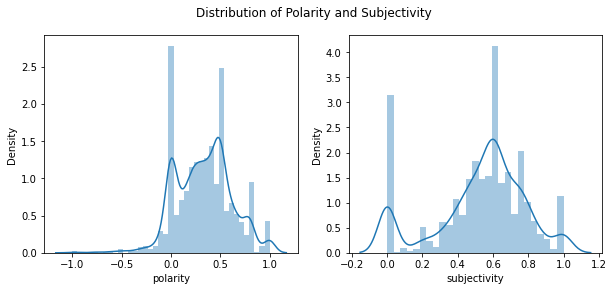

In [ ]:
## Visualizing Polarity and Subjectivity

plt.rcParams['figure.figsize'] = (10, 4)

plt.subplot(1, 2, 1)
sns.distplot(data['polarity'])

plt.subplot(1, 2, 2)
sns.distplot(data['subjectivity'])

plt.suptitle('Distribution of Polarity and Subjectivity')
plt.show()

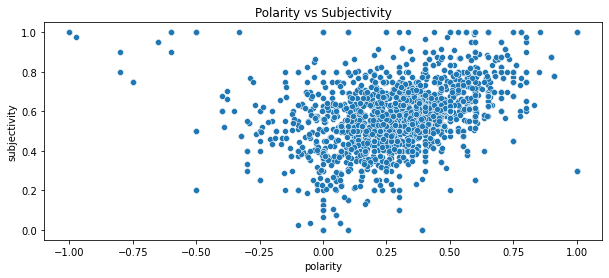

In [ ]:
# lets check relation between Polarity and Subjectivity

sns.scatterplot(data['polarity'], data['subjectivity'])
plt.title('Polarity vs Subjectivity')
plt.show()

## 3. Part-of-Speech Tagging

In [ ]:
# for Importing the Dataset
import pandas as pd

# for NLP
import spacy 
  
# python -m spacy download en_core_web_sm 
nlp = spacy.load("en_core_web_sm")

In [ ]:
# Process whole documents 
text = ("""My name is Shaurya Uppal.  
I enjoy writing articles on GeeksforGeeks checkout 
my other article by going to my profile section.""") 
  
doc = nlp(text) 
  
# Token and Tag 
for token in doc: 
    print(token, token.pos_) 
    
# You want list of Verb tokens 
print("Verbs:", [token.text for token in doc if token.pos_ == "VERB"]) 

My DET
name NOUN
is AUX
Shaurya PROPN
Uppal PROPN
. PUNCT
 
 SPACE
I PRON
enjoy VERB
writing VERB
articles NOUN
on ADP
GeeksforGeeks PROPN
checkout NOUN

 SPACE
my DET
other ADJ
article NOUN
by ADP
going VERB
to ADP
my DET
profile NOUN
section NOUN
. PUNCT
Verbs: ['enjoy', 'writing', 'going']


In [ ]:
# Named entity Recognition

doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

Apple 0 5 ORG
U.K. 27 31 GPE
$1 billion 44 54 MONEY


In [ ]:
# # using displacy

# from spacy import displacy
# doc = nlp(data['verified_reviews'][0])
# displacy.serve(doc, style="dep")

## 4. Visualizing Most Frequent Words

In [ ]:
# for mathematical operation
import numpy as np

# for Importing the Dataset
import pandas as pd

# for data visualizations
import seaborn as sns
import matplotlib.pyplot as plt

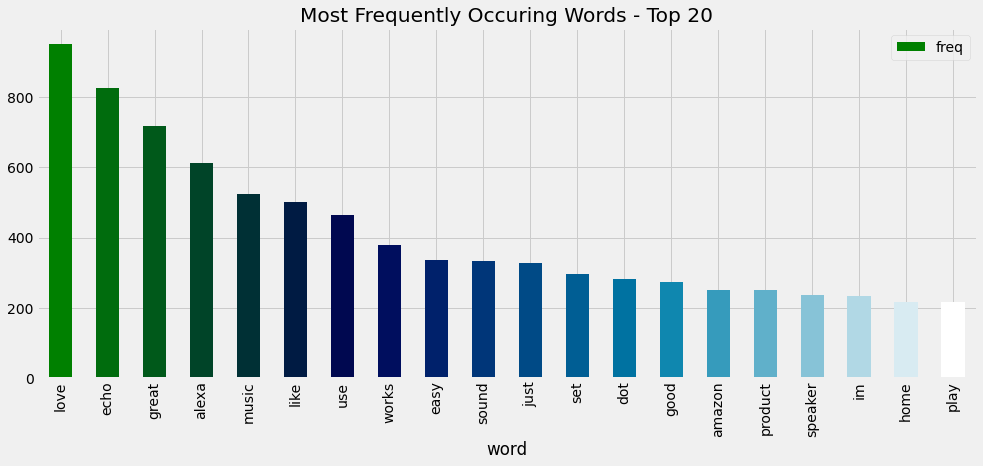

In [ ]:
## Visualizing the Most Frequent Words

from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(data.verified_reviews)
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

plt.style.use('fivethirtyeight')
color = plt.cm.ocean(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 6), color = color)
plt.title("Most Frequently Occuring Words - Top 20")
plt.show()

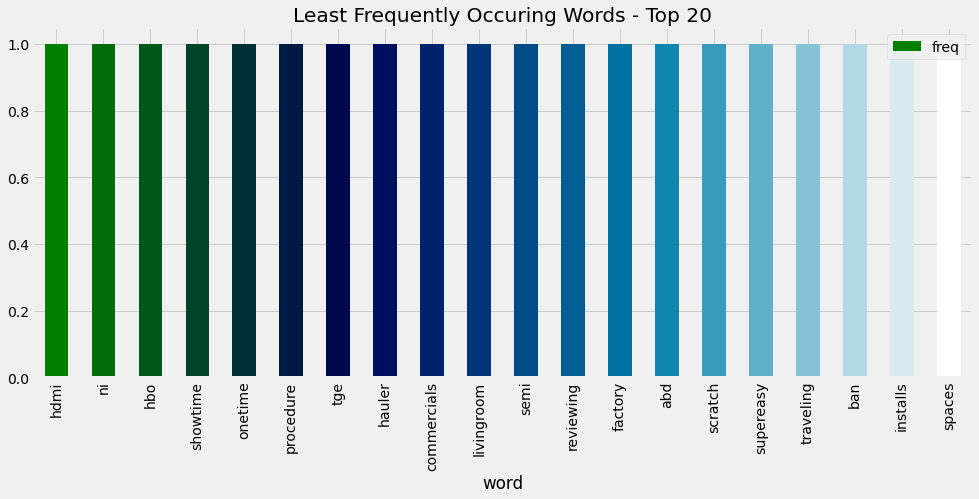

In [ ]:
## Visualizing the Least Frequent Words

from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(data.verified_reviews)
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

plt.style.use('fivethirtyeight')
color = plt.cm.ocean(np.linspace(0, 1, 20))
frequency.tail(20).plot(x='word', y='freq', kind='bar', figsize=(15, 6), color = color)
plt.title("Least Frequently Occuring Words - Top 20")
plt.show()

## 5. Visualizing N Grams

In [ ]:
# load in all the modules we're going to need
import nltk
import collections

# function for making ngrams
from nltk.util import ngrams 

# for reading the dataset
import pandas as pd

In [ ]:
# Visualizing the BiGrams

text = str(data['verified_reviews'])
tokenized = text.split()

# and get a list of all the bi-grams
esBigrams = ngrams(tokenized, 2)

# get the frequency of each bigram in our corpus
esBigramFreq = collections.Counter(esBigrams)

# what are the ten most popular ngrams in this Spanish corpus?
esBigramFreq.most_common(10)

[(('I', 'have'), 2),
 (('0', 'Love'), 1),
 (('Love', 'my'), 1),
 (('my', 'Echo'), 1),
 (('Echo', '1'), 1),
 (('1', 'Loved'), 1),
 (('Loved', 'it'), 1),
 (('it', '2'), 1),
 (('2', 'Sometimes'), 1),
 (('Sometimes', 'while'), 1)]

In [ ]:
# Visualizing the Trigrams

text = str(data['verified_reviews'])
tokenized = text.split()

# and get a list of all the bi-grams
esTrigrams = ngrams(tokenized, 3)

# get the frequency of each bigram in our corpus
esTrigramFreq = collections.Counter(esTrigrams)

# what are the ten most popular ngrams in this Spanish corpus?
esTrigramFreq.most_common(10)

[(('0', 'Love', 'my'), 1),
 (('Love', 'my', 'Echo'), 1),
 (('my', 'Echo', '1'), 1),
 (('Echo', '1', 'Loved'), 1),
 (('1', 'Loved', 'it'), 1),
 (('Loved', 'it', '2'), 1),
 (('it', '2', 'Sometimes'), 1),
 (('2', 'Sometimes', 'while'), 1),
 (('Sometimes', 'while', 'playing'), 1),
 (('while', 'playing', 'a'), 1)]

## 6. Introduction to Words Cloud

In [ ]:
# for Importing the Dataset
import pandas as pd

# for Wordscloud
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

# for visualization
import matplotlib.pyplot as plt

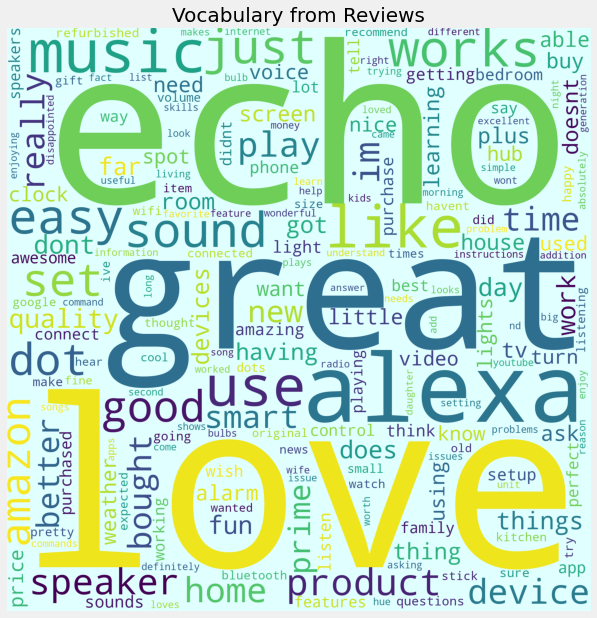

In [ ]:
# lets plot the Wordscloud

cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(data.verified_reviews)
sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

wordcloud = WordCloud(background_color = 'lightcyan', width = 2000, height = 2000).generate_from_frequencies(dict(words_freq))

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(wordcloud)
plt.title("Vocabulary from Reviews", fontsize = 20)
plt.show()

# TEXT CLASSIFICATION

## 4. Implementing a Naive Bayes Classifier

In [ ]:
# cleaning the texts
# importing the libraries for Natural Language Processing

import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
## Cleaning the Data

corpus = []

for i in range(0, 3150):
    review = re.sub('[^a-zA-Z]', ' ', data['verified_reviews'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [ ]:
# Extracting the Features using the Tfidf Vectorizer

from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer(max_features = 2500)
x = tf.fit_transform(corpus).toarray()
y = data.iloc[:, 4].values

print(x.shape)
print(y.shape)

(3150, 2500)
(3150,)


In [ ]:
# splitting the data into training and testing sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 15)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2205, 2500)
(2205,)
(945, 2500)
(945,)


### Naive Bayes Classifier

Naive Bayes classifiers are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong independence assumptions between the features. They are among the simplest Bayesian network models, but coupled with Kernel density estimation, they can achieve higher accuracy levels.

In [ ]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.6444444444444445
Testing Accuracy : 0.5936507936507937


# Implementing a SVM Classifier

In [ ]:
## Cleaning the Data

corpus = []

for i in range(0, 3150):
    review = re.sub('[^a-zA-Z]', ' ', data['verified_reviews'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [ ]:
# Extracting the Features using the Tfidf Vectorizer

from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer(max_features = 2500)
x = tf.fit_transform(corpus).toarray()
y = data.iloc[:, 4].values

print(x.shape)
print(y.shape)

(3150, 2500)
(3150,)


In [ ]:
# splitting the data into training and testing sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 15)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2205, 2500)
(2205,)
(945, 2500)
(945,)


### Support Vector Machines

In machine learning, support-vector machines are supervised learning models with associated learning algorithms that analyze data for classification and regression analysis

In [ ]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.982766439909297
Testing Accuracy : 0.9322751322751323


# SENTIMENT+ANALYZER+ENGINE+FULL+MATERIAL

# HomeWork_Solution

In [ ]:
# importing basic libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from textblob import TextBlob
import nltk

In [ ]:
# lets read the dataset
train =  pd.read_csv('train.csv', nrows=7000)

# lets check the shape of the dataset
train.shape

(7000, 2)

## 1. Count the number of words in each Review.

In [ ]:
# word count in each review
train['word_count'] = train['text'].apply(lambda x: len(x.split()))
train.head(3)

,text,label,word_count
0,I grew up (b. 1965) watching and loving the Th...,0,151
1,"When I put this movie in my DVD player, and sa...",0,326
2,Why do people who do not know what a particula...,0,184


## 2. Calculate the Polarity of the Reviews

In [ ]:
# Lets calculate the Polarity of the Reviews
def get_polarity(text):
    textblob = TextBlob(str(text))
    pol = textblob.sentiment.polarity
    return pol

# lets apply the function
train['polarity'] = train['text'].apply(get_polarity)

train.head()

,text,label,word_count,polarity
0,I grew up (b. 1965) watching and loving the Th...,0,151,0.123287
1,"When I put this movie in my DVD player, and sa...",0,326,0.131345
2,Why do people who do not know what a particula...,0,184,-0.041369
3,Even though I have great interest in Biblical ...,0,69,-0.135714
4,Im a die hard Dads Army fan and nothing will e...,1,178,0.123256


## 3. Remove all the punctuations from the Reviews.

In [ ]:
import string
# lets remove Punctuations from the Reviews
def punctuation_removal(messy_str):
    clean_list = [char for char in messy_str if char not in string.punctuation]
    clean_str = ''.join(clean_list)
    return clean_str

train['text'] = train['text'].apply(punctuation_removal)

## 4. Remove all the numbers from the Reviews

In [ ]:
# lets make a function to remove Numbers from the reviews
import re
def drop_numbers(list_text):
    list_text_new = []
    for i in list_text:
        if not re.search('\d', i):
            list_text_new.append(i)
    return ''.join(list_text_new)

train['text'] = train['text'].apply(drop_numbers)

## 5. Convert all the words to lowercase and lemmatise them

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
# for lemmatisation
def lemmatise(text):
    text_tokens = word_tokenize(text)
    text_lemm = [lemmatizer.lemmatize(word.lower()) for word in text_tokens]
    return ' '.join(text_lemm)

train['text'] = train['text'].apply(lemmatise)

## 6. Remove all the stopwords from the Reviews

In [ ]:
#nltk.download('stopwords')

In [ ]:
# for stopwords Removal
from nltk.corpus import stopwords
def remove_stopword(text):
    text_tokens = word_tokenize(text)
    tokens = [word for word in text_tokens if not word in set(stopwords.words('english'))]
    tokens_text = ' '.join(tokens)
    return tokens_text

train['text'] = train['text'].apply(remove_stopword)

## 7. Convert textual data to numbers using TF-IDF representation

In [ ]:
# TF-IDF representation
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer(max_features = 3000)

x = tf.fit_transform(train['text']).toarray()
y = train.iloc[:, 1].values

print(x.shape)
print(y.shape)

(7000, 3000)
(7000,)


## 8. Split the data into training and testing sets

In [ ]:
# splitting the data into training and testing sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 15)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4900, 3000)
(4900,)
(2100, 3000)
(2100,)


## 9. Make a Naive Bayes Classifier and evaluate it using Confusion matrix

In [ ]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.8771428571428571
Testing Accuracy : 0.7657142857142857


In [ ]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred)

array([[811, 247],
       [245, 797]])

# SENTIMENT ANALYSIS (Final)

# 3

In [3]:
import tweepy,re
from textblob import TextBlob
import matplotlib.pyplot as plt
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [34]:
# authentication
consumerKey = 'Sh8e4BV7zgeImZ5YvFHGKw779'
consumerSecret = '5YAlRjrcZrGtWN7PdsdwZb7xDm6CtZJiF5vS8tFfJ8Mr6QpkCu'
accessToken = '1374024600-ClsUjTgf7ZOqJn48RtMpQ38n8PjCML1VlJPoATY'
accessTokenSecret = 'NTnwZFBv4RczXtgRJjqiNFr5JwnfSOmYNxYqvaYJCkAeO'
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [35]:
# input for term to be searched and how many tweets to search
searchTerm = input("Enter Keyword/Tag to search about: ")
NoOfTerms = int(input("Enter how many tweets to search: "))

tweets = []
tweetText = []
# searching for tweets
tweets = tweepy.Cursor(api.search, q=searchTerm+" -filter:retweets", lang = "en").items(NoOfTerms)

Enter Keyword/Tag to search about: cognitive diversity
Enter how many tweets to search: 100


In [36]:
tweet_list = [tweet.text for tweet in tweets]
tweet_df = pd.DataFrame(tweet_list)
tweet_df

,0
0,I have been thinking a lot about the value of ...
1,Why do we think that a ‘Super Leader’ actually...
2,"@nilikm Communication impaired, esp. for heari..."
3,@scottmelker The poorest people can barely aff...
4,@_atanas_ Is that because perhaps those that h...
...,...
72,"sleeping, dazed and eating strained peas and c..."
73,FIU DAT Faculty @DrMattKutz presenting at @GLA...
74,▶️Learn why Cognitive Diversity is the key to ...
75,Everything is connected. Loss of ecosystemic d...


# 4

In [37]:
def clean_data(text):
    return ' '.join(re.sub("(@[a-zA-Z0-9]+)|([^0-9A-Za-z])|(https://[\w.]+/[\w]+)", " ", text).split())

tweet_df['cleaned_data'] = tweet_df[0].apply(clean_data)

In [38]:
tweet_df.head()

,0,cleaned_data
0,I have been thinking a lot about the value of ...,I have been thinking a lot about the value of ...
1,Why do we think that a ‘Super Leader’ actually...,Why do we think that a Super Leader actually e...
2,"@nilikm Communication impaired, esp. for heari...",Communication impaired esp for hearing impaire...
3,@scottmelker The poorest people can barely aff...,The poorest people can barely afford to eat we...
4,@_atanas_ Is that because perhaps those that h...,atanas Is that because perhaps those that have...


In [39]:
def drop_numbers(list_text):
    list_text_new = []
    for i in list_text:
        if not re.search('\d', i):
            list_text_new.append(i)
    return ''.join(list_text_new)

tweet_df['cleaned_data'] = tweet_df['cleaned_data'].apply(drop_numbers)

In [40]:
tweet_df.head()

,0,cleaned_data
0,I have been thinking a lot about the value of ...,I have been thinking a lot about the value of ...
1,Why do we think that a ‘Super Leader’ actually...,Why do we think that a Super Leader actually e...
2,"@nilikm Communication impaired, esp. for heari...",Communication impaired esp for hearing impaire...
3,@scottmelker The poorest people can barely aff...,The poorest people can barely afford to eat we...
4,@_atanas_ Is that because perhaps those that h...,atanas Is that because perhaps those that have...


In [41]:
import nltk
#nltk.download('all')

In [42]:
# changing all the words of the reviews column to lowercase letters
def lower_case(text):
    text_words = word_tokenize(text)
    text_words_lower = [x.lower() for x in text_words]
    return ' '.join(text_words_lower)

tweet_df['cleaned_data'] = tweet_df['cleaned_data'].apply(lower_case)

In [43]:
lemmatizer = WordNetLemmatizer()
def lemmatise(text):
    text_tokens = word_tokenize(text)
    text_lemm = [lemmatizer.lemmatize(word) for word in text_tokens]
    return ' '.join(text_lemm)

tweet_df['cleaned_data'] = tweet_df['cleaned_data'].apply(lemmatise)

In [44]:
tweet_df['cleaned_data'].values

array(['i have been thinking a lot about the value of diversity in research population for cognitive psychology this threa',
       'why do we think that a super leader actually exists we can only create super team when we effectively balan',
       'communication impaired esp for hearing impaired nd language ppl w cognitive impairment amp diversity',
       'the poorest people can barely afford to eat well and enjoy minor luxury they can t tie up their mon',
       'atanas is that because perhaps those that have lower diversity diet come from poorer household or something i',
       'nope cancel culture anxiety is the fear of living in a society bereft of cognitive diversity and civi',
       'i conceive of the drive towards homogeneity a a cognitive error in identity formation individual',
       'tip for improving inclusivity in the workplace encourage psychological safety empower cognitive diversity',
       'the tory culture war politics have britain s museum confused and worried 

In [45]:
def remove_stopword(text):
    text_tokens = word_tokenize(text)
    tokens = [word for word in text_tokens if not word in set(stopwords.words('english'))]
    tokens_text = ' '.join(tokens)
    return tokens_text

tweet_df['cleaned_data'] = tweet_df['cleaned_data'].apply(remove_stopword)

In [46]:
tweet_df['cleaned_data'].values

array(['thinking lot value diversity research population cognitive psychology threa',
       'think super leader actually exists create super team effectively balan',
       'communication impaired esp hearing impaired nd language ppl w cognitive impairment amp diversity',
       'poorest people barely afford eat well enjoy minor luxury tie mon',
       'atanas perhaps lower diversity diet come poorer household something',
       'nope cancel culture anxiety fear living society bereft cognitive diversity civi',
       'conceive drive towards homogeneity cognitive error identity formation individual',
       'tip improving inclusivity workplace encourage psychological safety empower cognitive diversity',
       'tory culture war politics britain museum confused worried art',
       'dietary diversity dd recognized globally vital element high quality diet high diet quality',
       'interesting article hbr people good judgement good listener reader embrace diver',
       'exciting opport

# 5

In [47]:
# Lets calculate the Polarity of the Reviews
def get_polarity(text):
    textblob = TextBlob(str(text))
    pol = textblob.sentiment.polarity
    if(pol==0):
        return "Neutral"
    elif(pol>0 and pol<=0.3):
        return "Weakly Positive"
    elif(pol>0.3 and pol<=0.6):
        return "Positive"
    elif(pol>0.6 and pol<=1):
        return "Strongly Positive"
    elif(pol>-0.3 and pol<=0):
        return "Weakly Negative"
    elif(pol>-0.6 and pol<=-0.3):
        return "Negative"
    elif(pol>-1 and pol<=-0.6):
        return "Strongly Negative"
    
tweet_df['polarity'] = tweet_df['cleaned_data'].apply(get_polarity)

In [48]:
tweet_df['polarity'].value_counts()

Neutral              31
Weakly Positive      27
Positive              8
Negative              6
Strongly Positive     3
Weakly Negative       2
Name: polarity, dtype: int64

In [49]:
tweet_df.dtypes

0               object
cleaned_data    object
polarity        object
dtype: object

In [51]:
#!pip install TextBlob

In [53]:
neutral = 0
wpositive = 0
spositive = 0
positive = 0
negative = 0
wnegative = 0
snegative = 0
polarity = 0

for i in range(0,77):
    textblob = TextBlob(str(tweet_df['cleaned_data'][i]))
    polarity+= textblob.sentiment.polarity
    pol = textblob.sentiment.polarity
    if (pol == 0):  # adding reaction of how people are reacting to find average later
        neutral += 1
    elif (pol > 0 and pol <= 0.3):
        wpositive += 1
    elif (pol > 0.3 and pol <= 0.6):
        positive += 1
    elif (pol > 0.6 and pol <= 1):
        spositive += 1
    elif (pol > -0.3 and pol <= 0):
        wnegative += 1
    elif (pol > -0.6 and pol <= -0.3):
        negative += 1
    elif (pol > -1 and pol <= -0.6):
        snegative += 1


In [54]:
# finding average reaction
polarity = polarity / NoOfTerms
polarity

0.08047023809523811

In [55]:
def percentage(part, whole):
    temp = 100 * float(part) / float(whole)
    return format(temp, '.2f')

In [56]:
 # finding average of how people are reacting
positive = percentage(positive, NoOfTerms)
wpositive = percentage(wpositive, NoOfTerms)
spositive = percentage(spositive, NoOfTerms)
negative = percentage(negative, NoOfTerms)
wnegative = percentage(wnegative, NoOfTerms)
snegative = percentage(snegative, NoOfTerms)
neutral = percentage(neutral, NoOfTerms)

In [57]:
 # printing out data
print("How people are reacting on " + searchTerm + " by analyzing " + str(NoOfTerms) + " tweets.")
print()
print("-----------------------------------------------------------------------------------------")
print()
print("General Report: ")

if (polarity == 0):
    print("Neutral")
elif (polarity > 0 and polarity <= 0.3):
    print("Weakly Positive")
elif (polarity > 0.3 and polarity <= 0.6):
    print("Positive")
elif (polarity > 0.6 and polarity <= 1):
    print("Strongly Positive")
elif (polarity > -0.3 and polarity <= 0):
    print("Weakly Negative")
elif (polarity > -0.6 and polarity <= -0.3):
    print("Negative")
elif (polarity > -1 and polarity <= -0.6):
    print("Strongly Negative")

print()
print("------------------------------------------------------------------------------------------")
print()
print("Detailed Report: ")
print(str(positive) + "% people thought it was positive")
print(str(wpositive) + "% people thought it was weakly positive")
print(str(spositive) + "% people thought it was strongly positive")
print(str(negative) + "% people thought it was negative")
print(str(wnegative) + "% people thought it was weakly negative")
print(str(snegative) + "% people thought it was strongly negative")
print(str(neutral) + "% people thought it was neutral")

How people are reacting on cognitive diversity by analyzing 100 tweets.

-----------------------------------------------------------------------------------------

General Report: 
Weakly Positive

------------------------------------------------------------------------------------------

Detailed Report: 
8.00% people thought it was positive
27.00% people thought it was weakly positive
3.00% people thought it was strongly positive
6.00% people thought it was negative
2.00% people thought it was weakly negative
0.00% people thought it was strongly negative
31.00% people thought it was neutral


In [58]:
sizes = [positive, wpositive, spositive, neutral, negative, wnegative, snegative]
colors = ['yellowgreen','lightgreen','darkgreen', 'gold', 'red','lightsalmon','darkred']
labels = ['Positive [' + str(positive) + '%]', 'Weakly Positive [' + str(wpositive) + '%]',
          'Strongly Positive [' + str(spositive) + '%]', 'Neutral [' + str(neutral) + '%]',
          'Negative [' + str(negative) + '%]', 'Weakly Negative [' + str(wnegative) + '%]', 
          'Strongly Negative [' + str(snegative) + '%]']

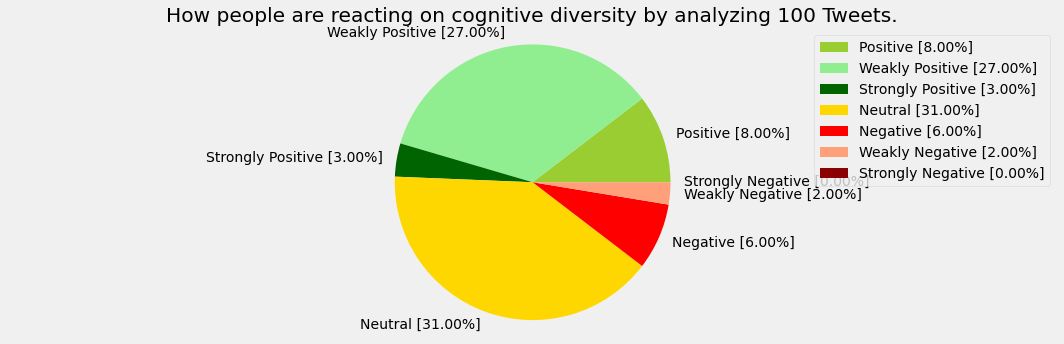

In [59]:
plt.pie(sizes, labels = labels, colors = colors)
plt.legend(labels, loc="best")
plt.title('How people are reacting on ' + searchTerm + ' by analyzing ' + str(NoOfTerms) + ' Tweets.')
plt.axis('equal')
plt.tight_layout()
plt.show()

# DRUGS+PRESCRIPTION+USING+REVIEWS+FULL+MATERIAL

In [60]:
import numpy as np
import pandas as pd
import string

import matplotlib.pyplot as plt
import seaborn as sns

import ipywidgets
from ipywidgets import interact

plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

### Reading the Data

In [61]:
# reading the Dataset
data = pd.read_csv('drug.csv')

# lets print the shape of the dataset
print("The Shape of the Dataset :", data.shape)

The Shape of the Dataset : (161297, 7)


In [62]:
# lets check the head of the dataset
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [63]:
# lets Explore Some of the Important Column in the dataset

print("Number of Unique Drugs present in the Dataset :", data['drugName'].nunique())
print("Number of Unique Medical Conditions present in the Dataset :", data['condition'].nunique())

print("\nThe Time Period of Collecting the Data")
print("Starting Date :", data['date'].min())
print("Ending Date :", data['date'].max())

Number of Unique Drugs present in the Dataset : 3436
Number of Unique Medical Conditions present in the Dataset : 884

The Time Period of Collecting the Data
Starting Date : 1-Apr-08
Ending Date : 9-Sep-17


### Summarizing the Dataset

In [64]:
# lets summarize the Dataset
data[['rating','usefulCount']].describe()

,rating,usefulCount
count,161297.000000,161297.000000
mean,6.994377,28.004755
std,3.272329,36.403742
min,1.000000,0.000000
25%,5.000000,6.000000
50%,8.000000,16.000000
75%,10.000000,36.000000
max,10.000000,1291.000000


In [65]:
# lets check the Number and Name of the Drugs with 0 Useful Count in Details
print("Analysis on Useless Drugs")
print("----------------------------")
print("The Number of Drugs with No Useful Count :", data[data['usefulCount'] == 0].count()[0])

# Lets Check the Number of Drugs with No Usesful Count with Review Greater than or Equal to 8
print("Number of Good Drugs with Lesser Useful Count :", data[(data['usefulCount'] == 0) &
                                                data['rating'] >= 8].count()[0])

# Lets Check the Average Rating of the Drugs with No Useful Count
print("Average Rating of Drugs with No Useful Count : {0:.2f}".format(data[data['usefulCount'] == 0]['rating'].mean()))

print("\nAnalysis on Useful Drugs")
print("----------------------------")
print("The Number of Drugs with Greater than 1000 Useful Counts :", data[data['usefulCount'] > 1000].count()[0])
print("Average Rating of Drugs with 1000+ Useful Counts :", data[data['usefulCount'] > 1000]['rating'].mean())
print("\nName and Condition of these Drugs: \n\n", 
    data[data['usefulCount'] > 1000][['drugName','condition']].reset_index(drop = True))

Analysis on Useless Drugs
----------------------------
The Number of Drugs with No Useful Count : 6318
Number of Good Drugs with Lesser Useful Count : 0
Average Rating of Drugs with No Useful Count : 5.80

Analysis on Useful Drugs
----------------------------
The Number of Drugs with Greater than 1000 Useful Counts : 4
Average Rating of Drugs with 1000+ Useful Counts : 10.0

Name and Condition of these Drugs: 

          drugName      condition
0          Mirena  Birth Control
1      Sertraline     Depression
2  Levonorgestrel  Birth Control
3          Zoloft     Depression


In [66]:
# lets summarize Categorical data also
data[['drugName','condition','review']].describe(include = 'object')

,drugName,condition,review
count,161297,160398,161297
unique,3436,884,112329
top,Levonorgestrel,Birth Control,"""Good"""
freq,3657,28788,33


In [67]:
# lets check for Missing Values
data.isnull().sum()

uniqueID         0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

In [68]:
# as we know that condition is an Important Column, so we will delete all the records where Condition is Missing
data = data.dropna()

# lets check the Missing values now
data.isnull().sum().sum()

0

### Unveiling Hidden Patterns from the Data

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


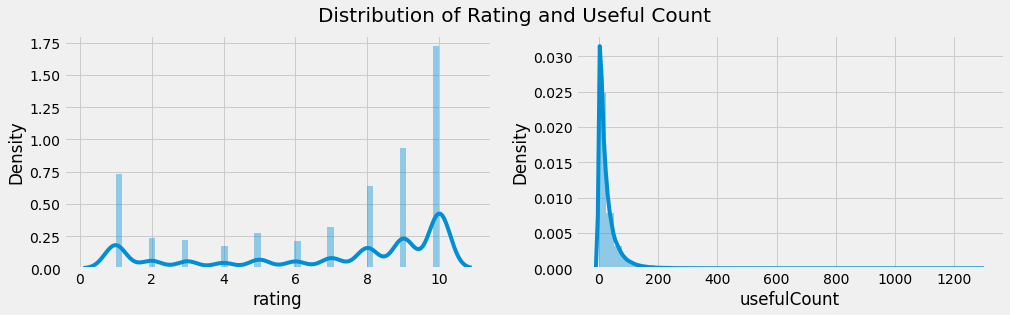

In [69]:
# lets check the Distribution of Rating and Useful Count

plt.rcParams['figure.figsize'] = (15, 4)

plt.subplot(1, 2, 1)
sns.distplot(data['rating'])

plt.subplot(1, 2, 2)
sns.distplot(data['usefulCount'])

plt.suptitle('Distribution of Rating and Useful Count \n ', fontsize = 20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


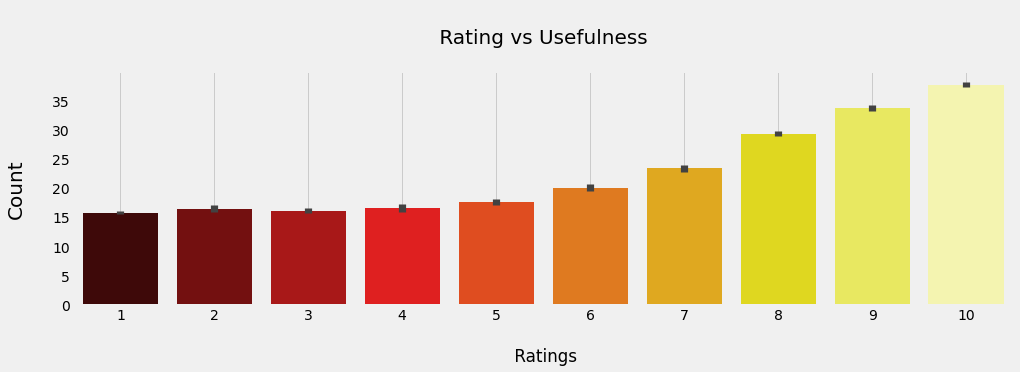

In [70]:
# lets check the Impact of Ratings on Usefulness

plt.rcParams['figure.figsize'] = (15, 4)
sns.barplot(data['rating'], data['usefulCount'], palette = 'hot')
plt.grid()
plt.xlabel('\n Ratings')
plt.ylabel('Count\n', fontsize = 20)
plt.title('\n Rating vs Usefulness \n', fontsize = 20)
plt.show()

In [71]:
# Checking whether Length of Review has any Impact on Ratings of the Drugs

# for that we need to create a new column to calculate length of the reviews
data['len']  = data['review'].apply(len)

In [72]:
# lets check the Impact of Length of Reviews on Ratings
data[['rating','len']].groupby(['rating']).agg(['min','mean','max'])

len                   
       min        mean    max
rating                       
1        5  428.784505   3692
2        9  452.902893  10787
3        8  461.249961   5112
4        7  464.077912   3030
5        6  477.982661   2048
6        4  467.957150   2202
7        6  485.597765   3063
8        3  483.584163   4087
9        3  477.696117   6182
10       3  443.215923   6192

In [73]:
# lets check the Highest Length Review
print("Length of Longest Review", data['len'].max())
data['review'][data['len'] == data['len'].max()].iloc[0]

Length of Longest Review 10787


'"Two and a half months ago I was prescribed Venlafaxine to help prevent chronic migraines.\r\nIt did help the migraines (reduced them by almost half), but with it came a host of side effects that were far worse than the problem I was trying to get rid of.\r\nHaving now come off of the stuff, I would not recommend anyone ever use Venlafaxine unless they suffer from extreme / suicidal depression. I mean extreme in the most emphatic sense of the word. \r\nBefore trying Venlafaxine, I was a writer. While on Venlafaxine, I could barely write or speak or communicate at all. More than that, I just didn&#039;t want to. Not normal for a usually outgoing extrovert.\r\nNow, I&#039;m beginning to write again - but my ability to speak and converse with others has deteriorated by about 95%. Writing these words is taking forever; keeping up in conversation with even one person is impossible, and I barely see the point of trying either. On Venlafaxine, words pretty much left me - my conversational vo

### Cleaning the Reviews

In [74]:
# as it is clear that the reviews have so many unnecassry things such as Stopwords, Punctuations, numbers etc

# First lets remove Punctuations from the Reviews
def punctuation_removal(messy_str):
    clean_list = [char for char in messy_str if char not in string.punctuation]
    clean_str = ''.join(clean_list)
    return clean_str

data['review'] = data['review'].apply(punctuation_removal)

In [75]:
# Now lets Remove the Stopwords also

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop = stopwords.words('english')
stop.append("i'm")

stop_words = []

for item in stop: 
    new_item = punctuation_removal(item)
    stop_words.append(new_item) 

def stopwords_removal(messy_str):
    messy_str = word_tokenize(messy_str)
    return [word.lower() for word in messy_str 
            if word.lower() not in stop_words ]

data['review'] = data['review'].apply(stopwords_removal)

In [76]:
# lets remove the Numbers also

import re
def drop_numbers(list_text):
    list_text_new = []
    for i in list_text:
        if not re.search('\d', i):
            list_text_new.append(i)
    return ' '.join(list_text_new)

data['review'] = data['review'].apply(drop_numbers)

### Calculating the Sentiment from Reviews

In [80]:
# # for using Sentiment Analyzer we will have to dowload the Vader Lexicon from NLTK

# import nltk
# nltk.download('vader_lexicon')

In [81]:
!pip install twython

In [78]:
# lets calculate the Sentiment from Reviews

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

train_sentiments = []

for i in data['review']:
    train_sentiments.append(sid.polarity_scores(i).get('compound'))
    
train_sentiments = np.asarray(train_sentiments)
data['sentiment'] = pd.Series(data=train_sentiments)

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [79]:
# lets check Impact of Sentiment on Reviews
data[['rating','sentiment']].groupby(['rating']).agg(['min','mean','max'])

sentiment                  
             min      mean     max
rating                            
1        -0.9931  0.005311  0.9898
2        -0.9929  0.003867  0.9924
3        -0.9925  0.003170  0.9877
4        -0.9919  0.000697  0.9867
5        -0.9920  0.014445  0.9882
6        -0.9914  0.008838  0.9936
7        -0.9938 -0.000509  0.9911
8        -0.9936  0.008952  0.9923
9        -0.9964  0.009489  0.9911
10       -0.9982  0.005446  0.9923

In [82]:
# as we can see that Sentiment and length of the review are not related to Reviews, we will drop the sentiment column

# lets remove the unique Id, date, review, len, and sentiment column also
data = data.drop(['date','uniqueID','sentiment','review','len'], axis = 1)

# lets check the name of columns now
data.columns

Index(['drugName', 'condition', 'rating', 'usefulCount'], dtype='object')

### Calculating Effectiveness and Usefulness of Drugs

In [83]:
# Lets Calculate an Effective Rating


min_rating = data['rating'].min()
max_rating = data['rating'].max()

def scale_rating(rating):
    rating -= min_rating
    rating = rating/(max_rating -1)
    rating *= 5
    rating = int(round(rating,0))
    
    if(int(rating) == 0 or int(rating)==1 or int(rating)==2):
        return 0
    else:
        return 1
    
data['eff_score'] = data['rating'].apply(scale_rating)

In [84]:
# lets also calculate Usefulness Score

data['usefulness'] = data['rating']*data['usefulCount']*data['eff_score']

# lets check the Top 10 Most Useful Drugs with their Respective Conditions
data[['drugName','condition','usefulness']][data['usefulness'] > 
                            data['usefulness'].mean()].sort_values(by = 'usefulness', 
                                        ascending = False).head(10).reset_index(drop = True)

,drugName,condition,usefulness
0,Sertraline,Depression,12910
1,Zoloft,Depression,12910
2,Levonorgestrel,Birth Control,12470
3,Mirena,Birth Control,12470
4,Zoloft,Depression,8541
5,Phentermine,Weight Loss,7960
6,Adipex-P,Weight Loss,7960
7,Implanon,Birth Control,7300
8,Viibryd,Depression,6930
9,Vilazodone,Depression,6930


### Analyzing the Medical Condtitions

In [85]:
# lets calculate the Number of Useless and Useful Drugs for Each Condition

@interact
def check(condition = list(data['condition'].value_counts().index)):
    return data[data['condition'] == condition]['eff_score'].value_counts()

interactive(children=(Dropdown(description='condition', options=('Birth Control', 'Depression', 'Pain', 'Anxie…

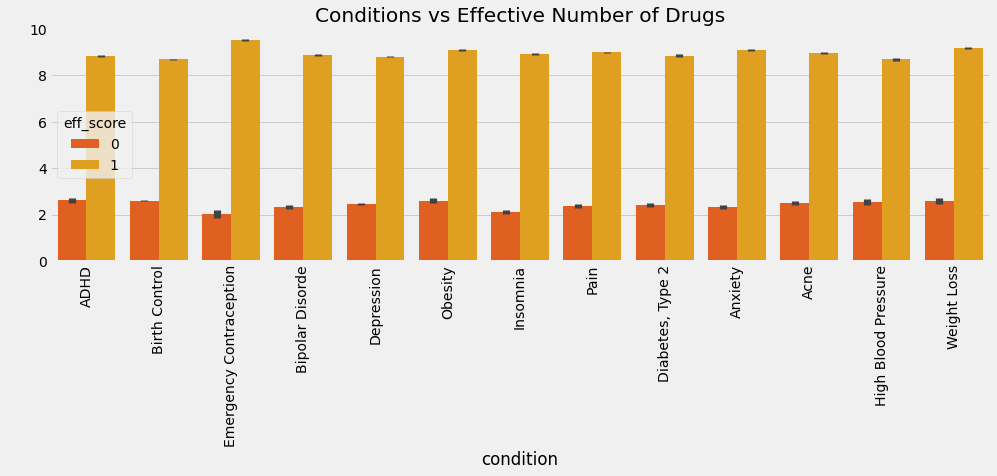

In [86]:
# lets check this in Graph, 

popular_conditions = ('Birth Control','Depression','Pain','Anxiety','Acne','Bipolar Disorde','Insomnia','Weight Loss',
                      'Obesity','ADHD', 'Diabetes, Type 2', 'Emergency Contraception', 'High Blood Pressure','Migrane')
conditions = data.loc[data['condition'].isin(popular_conditions)]

sns.barplot(x = conditions['condition'], y = conditions['rating'], hue = data['eff_score'], 
     palette = 'autumn')
plt.title('Conditions vs Effective Number of Drugs')
plt.xticks(rotation = 90)
plt.ylabel(' ')
plt.show()

In [87]:
# lets check the Most Common Conditions

print("Number of Unique Conditions :", data['condition'].nunique())
data['condition'].value_counts().head(10)

Number of Unique Conditions : 884


Birth Control      28788
Depression          9069
Pain                6145
Anxiety             5904
Acne                5588
Bipolar Disorde     4224
Insomnia            3673
Weight Loss         3609
Obesity             3568
ADHD                3383
Name: condition, dtype: int64

In [88]:
# lets check Drugs, which were useful to Highest Number of Poeple
data[['drugName','usefulCount']][data['usefulCount'] >
                    data['usefulCount'].mean()].sort_values(by = 'usefulCount',
                                        ascending = False).head(10).reset_index(drop = True)

,drugName,usefulCount
0,Zoloft,1291
1,Sertraline,1291
2,Levonorgestrel,1247
3,Mirena,1247
4,Zoloft,949
5,Adipex-P,796
6,Phentermine,796
7,Celexa,771
8,Citalopram,771
9,Implanon,730


### Finding Most Useful and Useless Drugs for each Condition

In [89]:
# lets remove all the Duplicates from the Dataset
data = data.drop_duplicates()

In [90]:
# lets find the Highest and Lowest Rated Drugs for each Condition

@interact
def high_low_rate(condition = list(data['condition'].value_counts().index)):
    print("\n Top 5 Drugs")
    print(data[data['condition'] == condition][['drugName','usefulness']].sort_values(by = 'usefulness',
                                                 ascending = False).head().reset_index(drop = True))
    print("\n\n Bottom 5 Drugs")
    print(data[data['condition'] == condition][['drugName','usefulness']].sort_values(by = 'usefulness',
                                                 ascending = True).head().reset_index(drop = True))

interactive(children=(Dropdown(description='condition', options=('Birth Control', 'Depression', 'Pain', 'Anxie…